<a href="https://colab.research.google.com/github/Rabbia-Ijaz/TryItOut/blob/main/GarmentTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
import glob
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2
from IPython.display import display
!pip install UVTextureConverter
from UVTextureConverter import UVConverter
from UVTextureConverter import Normal2Atlas
from UVTextureConverter import Atlas2Normal

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def Display(title1 ,a): #global display func
    name=title1+'.jpg'
    cv2.imwrite(name,a)
    print(title1)
    display(Image(filename=name))

input=""
input_IUV=""
target=""

def Inputfunc(input_1,input_1_IUV,target_1,target_IUV):
  
  path="/content/drive/MyDrive/Colab Notebooks/"
  input=path+input_1
  input_IUV=path+input_1_IUV
  target=path+target_1
  model_image = Image.open(path+input_1)
  dense_image = Image.open(path+input_1_IUV)
  model_image_1 = Image.open(path+target_1)
  dense_image_1 = Image.open(path+target_IUV)
  return input,target,input_IUV,model_image,dense_image,model_image_1,dense_image_1



In [ ]:
#input,target,input_IUV,model_image,dense_image,model_image_1,dense_image_1=Inputfunc("input_4.jpg","input_4_IUV.png","input_7.jpg","input_7_IUV.png")
#input,target,input_IUV,model_image,dense_image,model_image_1,dense_image_1=Inputfunc("input_7.jpg","input_7_IUV.png","input_8.jpg","input_8_IUV.png")
#input,target,input_IUV,model_image,dense_image,model_image_1,dense_image_1=Inputfunc("input_5.jpg","input_5_IUV.png","input_6.jpg","input_6_IUV.png")
#input,target,input_IUV,model_image,dense_image,model_image_1,dense_image_1=Inputfunc("input_9.jpg","input_9_IUV.png","input_10.jpg","input_10_IUV.png")
#input,target,input_IUV,model_image,dense_image,model_image_1,dense_image_1=Inputfunc("input_3.jpg","input_3_IUV.png","input_5.jpg","input_5_IUV.png")
input,target,input_IUV,model_image,dense_image,model_image_1,dense_image_1=Inputfunc("input_2.jpg","input_2_IUV.png","input_3.jpg","input_3_IUV.png")

##**Source Image**

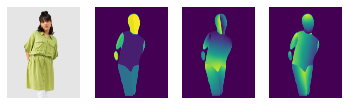

In [ ]:
dense_array = np.asarray(dense_image)
model_dense=np.zeros(shape=(3,dense_array[:,:,0].shape[0],dense_array[:,:,0].shape[1]))
model_dense[0]=dense_array[:,:,2]
model_dense[1]=dense_array[:,:,1]
model_dense[2]=dense_array[:,:,0]
model_dense.shape
model_array = np.asarray(model_image)[:model_dense.shape[1],:model_dense.shape[2],:]


figure, axes = plt.subplots(nrows=1, ncols=4)
axes.ravel()[0].imshow(model_array)
axes.ravel()[0].set_axis_off()
axes.ravel()[1].imshow(model_dense[0])
axes.ravel()[1].set_axis_off()
axes.ravel()[2].imshow(model_dense[1])
axes.ravel()[2].set_axis_off()
axes.ravel()[3].imshow(model_dense[2])
axes.ravel()[3].set_axis_off()

##**Target Image**

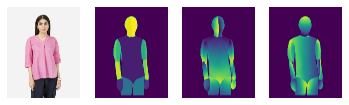

In [ ]:
dense_array_1 = np.asarray(dense_image_1)
model_dense_1=np.zeros(shape=(3,dense_array_1[:,:,0].shape[0],dense_array_1[:,:,0].shape[1]))
model_dense_1[0]=dense_array_1[:,:,2]
model_dense_1[1]=dense_array_1[:,:,1]
model_dense_1[2]=dense_array_1[:,:,0]
model_dense_1.shape
model_array_1 = np.asarray(model_image_1)[:model_dense_1.shape[1],:model_dense_1.shape[2],:]

#display
figure, axes = plt.subplots(nrows=1, ncols=4)
axes.ravel()[0].imshow(model_array_1)
axes.ravel()[0].set_axis_off()
axes.ravel()[1].imshow(model_dense_1[0])
axes.ravel()[1].set_axis_off()
axes.ravel()[2].imshow(model_dense_1[1])
axes.ravel()[2].set_axis_off()
axes.ravel()[3].imshow(model_dense_1[2])
axes.ravel()[3].set_axis_off()


In [ ]:
solution = 75
solution_float = float(solution) - 1

##**Texture Extraction from Source Image**

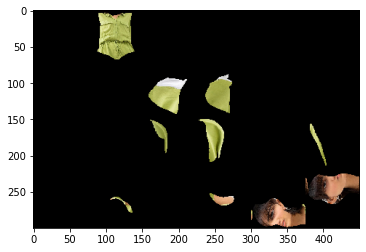

In [ ]:
U = model_dense[1, :, :]
V = model_dense[2, :, :]
parts = list()
for PartInd in range(1, 25):
    actual_part = np.zeros((solution, solution, 3))
    x, y = np.where(model_dense[0,:,:] == PartInd)
    if len(x) == 0:
        parts.append(actual_part)
        continue
    u_current_points = U[x, y]
    v_current_points = V[x, y]


    tex_map_coords = ((255-v_current_points)*solution_float/255.).astype(int), (u_current_points*solution_float/255.).astype(int)
    for c in range(3):
        actual_part[tex_map_coords[0], tex_map_coords[1], c] = model_array[x, y, c]

    parts.append(actual_part)


tex_trans, mask_trans = UVConverter.create_texture(input, input_IUV, parts_size=solution, concat=False)

# for display
TextureIm = UVConverter.concat_atlas_tex(tex_trans)  # 800 x 1200 x 3
plt.imshow(TextureIm)


In [ ]:
model_image_identity = model_array * np.expand_dims((model_dense[0] == 2)+(model_dense[0] == 15)+(model_dense[0] == 16)+(model_dense[0] == 17)+(model_dense[0] == 18)+(model_dense[0] == 19)+(model_dense[0] == 20)+ (model_dense[0] == 21)+(model_dense[0] == 22), 2)
#plt.imshow(model_image_identity)

In [ ]:
np.array(parts).shape

(24, 75, 75, 3)

In [ ]:
IUV = model_dense

I=model_dense[0,:,:]
U = model_dense[1,:,:]
V = model_dense[2,:,:]

R_im = np.zeros(U.shape)
G_im = np.zeros(U.shape)
B_im = np.zeros(U.shape)

for PartInd in range(1, 25):
    tex = np.array(parts)[PartInd - 1, :, :, :].squeeze()
    R = tex[:,:,0]
    G = tex[:,:,1]
    B = tex[:,:,2]
    ###############
    x,y = np.where(IUV[0,:,:]==PartInd)
    u_current_points = U[x,y]   #  Pixels that belong to this specific part.
    v_current_points = V[x,y]
    ##
    r_current_points = R[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
    g_current_points = G[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
    b_current_points = B[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
    ##  Get the RGB values from the texture images.
    R_im[IUV[0,:,:]==PartInd] = r_current_points
    G_im[IUV[0,:,:]==PartInd] = g_current_points
    B_im[IUV[0,:,:]==PartInd] = b_current_points
generated_image = np.concatenate((R_im[:,:,np.newaxis],G_im[:,:,np.newaxis],B_im[:,:,np.newaxis]), axis =2 ).astype(np.uint8)
#generated_image.shape
#plt.imshow(np.uint8(generated_image)*255)

##**Image Synthesis**

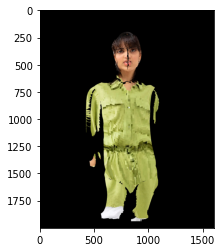

In [ ]:
IUV = model_dense_1
U = model_dense_1[1,:,:]
V = model_dense_1[2,:,:]

R_im = np.zeros(U.shape)
G_im = np.zeros(U.shape)
B_im = np.zeros(U.shape)

for PartInd in range(1, 25):
    tex = np.array(parts)[PartInd - 1, :, :, :].squeeze()
    R = tex[:,:,0]
    G = tex[:,:,1]
    B = tex[:,:,2]
    ###############
    x,y = np.where(IUV[0,:,:]==PartInd)
    u_current_points = U[x,y]   #  Pixels that belong to this specific part.
    v_current_points = V[x,y]
    ##
    r_current_points = R[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
    g_current_points = G[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
    b_current_points = B[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
    ##  Get the RGB values from the texture images.
    R_im[IUV[0,:,:]==PartInd] = r_current_points
    G_im[IUV[0,:,:]==PartInd] = g_current_points
    B_im[IUV[0,:,:]==PartInd] = b_current_points
generated_image_1 = np.concatenate((R_im[:,:,np.newaxis],G_im[:,:,np.newaxis],B_im[:,:,np.newaxis]), axis =2 ).astype(np.uint8)

plt.imshow(np.uint8(generated_image_1) * 255)

##**Extraction of the Important Part**

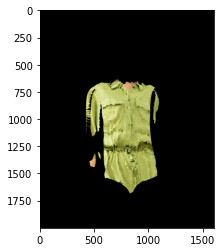

In [ ]:
apparel_matrix = np.expand_dims((model_dense_1[0] == 2)+(model_dense_1[0] == 15)+(model_dense_1[0] == 16)+(model_dense_1[0] == 17)+(model_dense_1[0] == 18)+(model_dense_1[0] == 19)+(model_dense_1[0] == 20)+ (model_dense_1[0] == 21)+(model_dense_1[0] == 22), 2)

apparel = generated_image_1 * apparel_matrix * 255
plt.imshow(apparel)


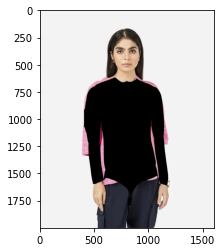

In [ ]:
model_image_identity_1 = model_array_1 * np.logical_not(apparel_matrix)
plt.imshow(model_image_identity_1)

##**Extraction Mapping on Target Body**

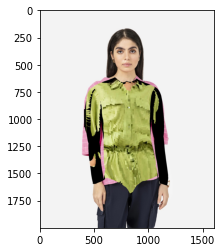

In [ ]:
FinalImage=model_image_identity_1 + apparel
plt.imshow(FinalImage)


##**Inpainting**

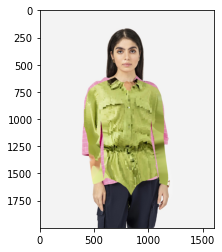

In [ ]:
Mask=cv2.imread(target,0)
for i in range(0,FinalImage.shape[0]):
  for j in range(0,FinalImage.shape[1]):
    if (apparel[i][j][0]==0 and apparel[i][j][1]==0 and apparel[i][j][2]==0):
      Mask[i][j]=255
    else:
      Mask[i][j]=0
dst = cv2.inpaint(apparel,Mask,3,cv2.INPAINT_TELEA)

for i in range(0,FinalImage.shape[0]):
  for j in range(0,FinalImage.shape[1]):
    if (model_image_identity_1[i][j][0]==0 and model_image_identity_1[i][j][1]==0 and model_image_identity_1[i][j][2]==0):
      dst[i][j]=dst[i][j]
    else:
      dst[i][j]=model_image_identity_1[i][j]

plt.imshow(dst)

True

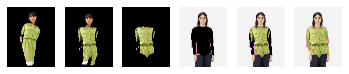

In [ ]:
figure, axes = plt.subplots(nrows=1, ncols=6)
axes.ravel()[0].imshow(np.uint8(generated_image)*255)
axes.ravel()[0].set_axis_off()
axes.ravel()[1].imshow(np.uint8(generated_image_1)*255)
axes.ravel()[1].set_axis_off()
axes.ravel()[2].imshow(apparel)
axes.ravel()[2].set_axis_off()
axes.ravel()[3].imshow(model_image_identity_1)
axes.ravel()[3].set_axis_off()
axes.ravel()[4].imshow(FinalImage)
axes.ravel()[4].set_axis_off()
axes.ravel()[5].imshow(dst)
axes.ravel()[5].set_axis_off()

dst = cv2.cvtColor(np.array(dst), cv2.COLOR_RGB2BGR)
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/dst.jpg',dst)